In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)


In [2]:
def asf_project(pr):
    name = pr.split("-")[0]
    if name == "incubator":
        return pr.split("-")[1]
    return name

In [3]:
project = "ozone"

In [4]:
# Parameters
project = "pulsar"


In [5]:
actions = pd.read_csv("github-action-run.csv.gz")
                          
actions.createdat = pd.to_datetime(actions.createdat * 1000000, utc = True)
actions.updatedat = pd.to_datetime(actions.updatedat * 1000000, utc = True)
actions.firstjobstarted = pd.to_datetime(actions.firstjobstarted * 1000000, utc = True)
actions.lastjobcompleted = pd.to_datetime(actions.lastjobcompleted * 1000000, utc = True)                

In [6]:
actions["project"] = actions.repo.apply(asf_project)
actions["jobhours"] = actions.jobseconds / 60 / 60
actions["month"] = actions.createdat.dt.strftime("%Y-%m")

In [7]:
actions =  actions[actions.month.isin(["2021-03","2021-02"])]
last_month = "2021-03"
actions = actions[actions.project == project]

## Number of jobhours used by month

Maximum available value is 180 * 24 * days == 129600 (30 days) .. 133920 (31 days)

In [8]:
actions[["jobhours"]].groupby([actions.project,actions.month]).count().reset_index().groupby("month").sum()

,jobhours
month,
2021-02,22274
2021-03,22529


## Number of jobs executed by git repositories (last month)

In [9]:
actions[actions.month == last_month][["repo","jobhours"]].groupby("repo").agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False).head(20)

jobhours                    
                             sum      mean       max
repo                                                
pulsar              10762.587500  0.480709  2.011667
pulsar-helm-chart      13.397222  0.199959  0.465833
pulsar-client-go        8.810833  0.146847  0.596944
pulsar-client-node      0.553889  0.079127  0.131667
pulsar-manager          0.244722  0.081574  0.084722
pulsar-dotpulsar        0.007778  0.007778  0.007778
pulsar-adapters         0.000000  0.000000  0.000000

## Job hour statustics per workflows

In [10]:
actions[actions.month == last_month][["repo","workflowid","jobhours"]].groupby(["repo","workflowid"]).agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False)

jobhours                    
                                      sum      mean       max
repo               workflowid                                
pulsar             972         796.632500  0.944997  2.011667
                   955         682.141389  0.809183  2.003611
                   958         660.796389  0.783863  2.003611
                   961         607.780000  0.720973  2.003611
                   952         576.055833  0.683340  2.003889
                   967         568.536667  0.674421  2.003611
                   953         543.469167  0.623960  2.001389
                   3639916     536.371389  0.637021  1.484167
                   963         523.916111  0.621490  2.003611
                   950         521.998056  0.619215  2.003889
                   964         518.890000  0.615528  1.617222
                   3672548     509.249722  0.604810  1.809167
                   956         501.889444  0.595361  1.600278
                   1936226     480.189722  0.551942  2.003889
                   1936348     335.722500  0.388118  2.000833
                   1937987     309.100278  0.355288  2.000556
                   1936228     286.105556  0.328857  2.000556
                   6024487     285.533611  0.664032  1.234444
                   960         266.360000  0.644939  1.293056
                   957         241.358611  0.284621  0.818611
                   969         231.373889  0.274465  1.207222
                   3842061     229.950833  0.314140  1.223611
                   1936225     200.551944  0.230519  2.000278
                   2355769     158.287222  1.276510  2.004167
                   144146      149.491111  0.171632  1.397500
                   497930       12.605556  0.007265  0.134444
pulsar-client-go   276019        7.658889  0.547063  0.596944
pulsar             389098        6.796111  0.130694  0.188333
                   5652993       6.563611  0.007553  0.029167
                   389100        6.144444  0.118162  0.190556
                   7143096       5.182500  0.103650  0.571389
pulsar-helm-chart  1078060       1.751389  0.350278  0.410556
                   1078059       1.742500  0.348500  0.465833
                   1078064       1.672222  0.334444  0.423889
                   1078058       1.665278  0.333056  0.449722
                   1078055       1.624722  0.324944  0.404722
pulsar-client-go   276065        1.151944  0.082282  0.108611
pulsar-helm-chart  1078054       1.033333  0.206667  0.236389
                   1078063       0.981667  0.196333  0.204167
                   1078061       0.952222  0.190444  0.231944
                   1078062       0.948611  0.189722  0.201111
                   1078056       0.921111  0.184222  0.194167
pulsar             966           0.622500  0.622500  0.622500
                   3684131       0.606667  0.025278  0.108889
pulsar-client-node 2390440       0.553889  0.079127  0.131667
pulsar             1469275       0.419167  0.419167  0.419167
                   1469280       0.261944  0.261944  0.261944
                   1469274       0.259167  0.259167  0.259167
                   1450194       0.255556  0.255556  0.255556
pulsar-manager     342653        0.244722  0.081574  0.084722
pulsar             144145        0.237778  0.237778  0.237778
                   4930031       0.200000  0.066667  0.099722
                   1469276       0.177778  0.177778  0.177778
                   144966        0.159722  0.159722  0.159722
                   1469281       0.125278  0.125278  0.125278
                   1469745       0.114167  0.114167  0.114167
                   144964        0.103611  0.103611  0.103611
pulsar-helm-chart  1078311       0.069167  0.034583  0.035000
                   1078057       0.023611  0.004722  0.005556
                   1625407       0.011389  0.002278  0.004167
pulsar-dotpulsar   1670627       0.007778  0.007778  0.007778
pulsar-client-go   1848328       0.000000  0.000000  0.000000
pul

## Slowest workflow runs


In [11]:
actions.sort_values("jobhours", ascending=False).head(25)

,org,repo,id,runnumber,createdat,updatedat,status,conclusion,workflowid,firstjobstarted,lastjobcompleted,jobdetails,jobs,jobseconds,project,jobhours,month
1007836,apache,pulsar-client-go,572548197,462,2021-02-16 18:49:39+00:00,2021-02-17 00:50:10+00:00,completed,failure,276019,2021-02-16 18:49:51+00:00,2021-02-17 00:50:04+00:00,True,4,86448,pulsar,24.013333,2021-02
1007835,apache,pulsar-client-go,572517234,461,2021-02-16 18:36:50+00:00,2021-02-17 00:39:24+00:00,completed,failure,276019,2021-02-16 18:38:50+00:00,2021-02-17 00:39:19+00:00,True,4,86433,pulsar,24.009167,2021-02
1006491,apache,pulsar,681923101,8713,2021-03-24 05:01:37+00:00,2021-03-24 07:02:39+00:00,completed,failure,972,2021-03-24 05:01:52+00:00,2021-03-24 07:02:34+00:00,True,1,7242,pulsar,2.011667,2021-03
832987,apache,pulsar,683989390,835,2021-03-24 18:05:13+00:00,2021-03-24 20:34:24+00:00,completed,failure,2355769,2021-03-24 18:34:04+00:00,2021-03-24 20:34:19+00:00,True,1,7215,pulsar,2.004167,2021-03
1005099,apache,pulsar,545276404,7460,2021-02-07 12:25:28+00:00,2021-02-07 14:26:01+00:00,completed,failure,972,2021-02-07 12:25:42+00:00,2021-02-07 14:25:57+00:00,True,1,7215,pulsar,2.004167,2021-02
1005792,apache,pulsar,613329518,8084,2021-03-02 08:12:03+00:00,2021-03-02 10:39:59+00:00,completed,failure,972,2021-03-02 08:39:40+00:00,2021-03-02 10:39:55+00:00,True,1,7215,pulsar,2.004167,2021-03
947321,apache,pulsar,594476882,7891,2021-02-24 01:30:38+00:00,2021-02-24 03:48:01+00:00,completed,failure,960,2021-02-24 01:47:43+00:00,2021-02-24 03:47:57+00:00,True,1,7214,pulsar,2.003889,2021-02
1005457,apache,pulsar,584029225,7783,2021-02-20 10:38:31+00:00,2021-02-20 13:08:47+00:00,completed,failure,972,2021-02-20 11:08:30+00:00,2021-02-20 13:08:44+00:00,True,1,7214,pulsar,2.003889,2021-02
1005335,apache,pulsar,572983540,7673,2021-02-16 22:03:48+00:00,2021-02-17 00:04:23+00:00,completed,failure,972,2021-02-16 22:04:04+00:00,2021-02-17 00:04:18+00:00,True,1,7214,pulsar,2.003889,2021-02
986474,apache,pulsar,529859716,7256,2021-02-02 05:47:25+00:00,2021-02-02 09:52:14+00:00,completed,failure,967,2021-02-02 07:51:56+00:00,2021-02-02 09:52:10+00:00,True,1,7214,pulsar,2.003889,2021-02


In [12]:
job = pd.read_csv("github-action-job.csv.gz")                          
job.startedat = pd.to_datetime(job.startedat * 1000000, utc = True)
job.completedat = pd.to_datetime(job.completedat * 1000000, utc = True)
job["project"] = job.repo.apply(asf_project)

In [13]:
job["jobhours"] = (job.completedat - job.startedat).dt.seconds / 60 / 60

In [14]:
job = job[job.project == project]

## Slowest job executions by job names

In [15]:
job[["jobhours"]].groupby([job.org,job.repo, job.name]).sum().reset_index().sort_values("jobhours", ascending=False).head(25)

,org,repo,name,jobhours
34,apache,pulsar,unit-tests,5554.427500
24,apache,pulsar,process,2006.826389
20,apache,pulsar,cli,1723.212222
29,apache,pulsar,thread,1677.505278
23,apache,pulsar,messaging,1545.150833
15,apache,pulsar,backwards-compatibility,1421.315000
27,apache,pulsar,sql,1391.132500
22,apache,pulsar,function-state,1364.754722
26,apache,pulsar,shade-check,1346.430278
31,apache,pulsar,tiered-jcloud,1309.435000


## Number of job executions per status

In [16]:
job[["id"]].groupby([job.org,job.repo,  job.conclusion]).count().reset_index().sort_values("id", ascending=False).head(25)

,org,repo,conclusion,id
2,apache,pulsar,success,39571
1,apache,pulsar,failure,7656
0,apache,pulsar,cancelled,6687
5,apache,pulsar-client-go,success,372
10,apache,pulsar-helm-chart,success,113
3,apache,pulsar-client-go,cancelled,101
4,apache,pulsar-client-go,failure,39
7,apache,pulsar-client-node,success,9
9,apache,pulsar-helm-chart,failure,3
11,apache,pulsar-manager,success,3


In [17]:
start = job.loc[:,["org","repo","project","id","runid","startedat"]]
start["value"] = 1
start = start.rename(columns={"startedat":"date"})

end = job.loc[:,["org","repo","project","id","runid","completedat"]]
end["value"] = -1
end = end.rename(columns={"completedat":"date"})
events = pd.concat([start, end]).sort_values("date")
events["running"] = events.value.cumsum()


## Average (12h window) parallel running/queued job at a given time

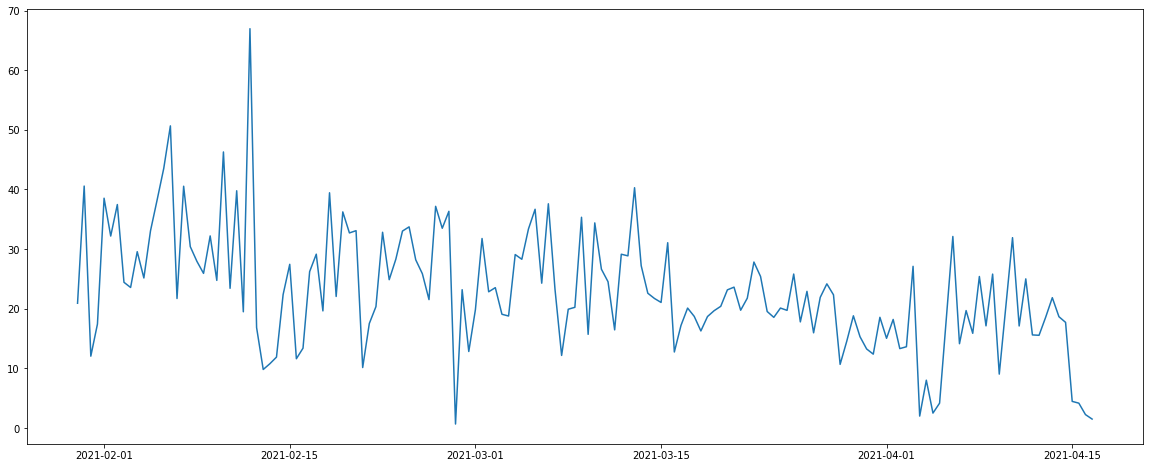

In [18]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").mean().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()

In [19]:
## Max (12h window) parallel running/queued job at a given time

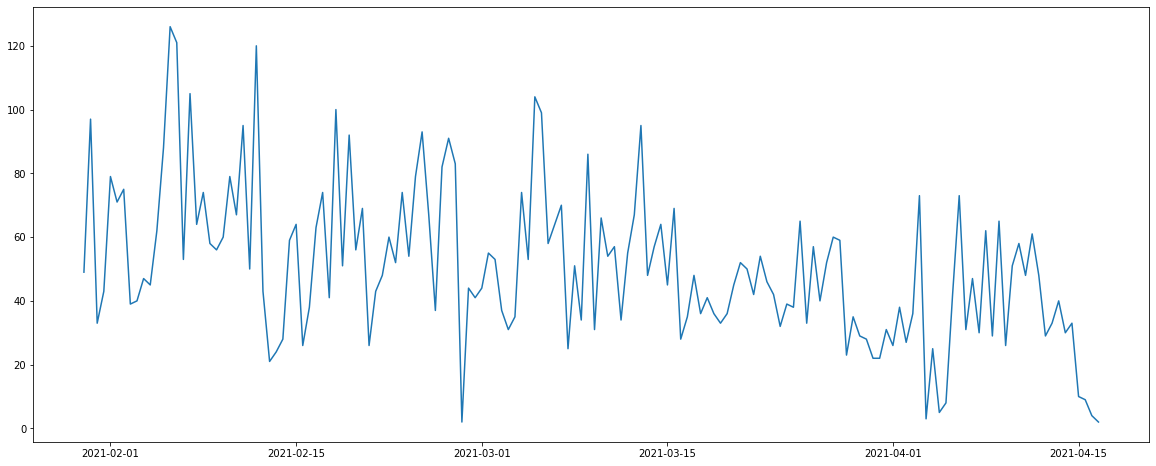

In [20]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").max().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()